# Figure 4a (to be moved to main)

In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress,norm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
import sys
sys.path.append('../../')
from consensus_variables import *

In [3]:
pd.set_option('display.max_columns', None)

# Define gene order and plot and data directories

In [4]:
plots_dir = "./plot"
data_dir = "./data"

In [5]:
# somatic_maf_file = f"{deepcsa_run_dir}/somaticmutations/all_samples.somatic.mutations.tsv"
# maf_file =  f"{deepcsa_run_dir}/writemaf/all_samples.filtered.tsv.gz"

maf_df = pd.read_table(maf_file)
somatic_maf_df = pd.read_table(somatic_maf_file)

/tmp/ipykernel_3459628/3879647564.py:4: DtypeWarning: Columns (49,92,112) have mixed types. Specify dtype option on import or set low_memory=False.
  maf_df = pd.read_table(maf_file)
/tmp/ipykernel_3459628/3879647564.py:5: DtypeWarning: Columns (49,92,112) have mixed types. Specify dtype option on import or set low_memory=False.
  somatic_maf_df = pd.read_table(somatic_maf_file)


In [6]:
mutations_in_tert_promoter = somatic_maf_df[(somatic_maf_df['CHROM'] == 'chr5') &
                                            (somatic_maf_df['POS'] >= 1294942) &
                                            (somatic_maf_df['POS'] <= 1295289)
                                   ].copy()

mutations_in_tert_promoter.head()

,CHROM,POS,REF,ALT,FILTER,INFO,FORMAT,SAMPLE,DEPTH,ALT_DEPTH,REF_DEPTH,VAF,vd_DEPTH,vd_ALT_DEPTH,vd_REF_DEPTH,vd_VAF,numNs,VAF_Ns,DEPTH_AM,ALT_DEPTH_AM,REF_DEPTH_AM,VAF_AM,numNs_AM,VAF_Ns_AM,DEPTH_ND,ALT_DEPTH_ND,VAF_ND,VAF_distorted_expanded,VAF_distorted_expanded_sq,VAF_distortion,VAF_distortion_sq,MUT_ID,SAMPLE_ID,METHOD,PROJECT_NAME,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,gnomADe_AF,gnomADe_AFR_AF,gnomADe_AMR_AF,gnomADe_ASJ_AF,gnomADe_EAS_AF,gnomADe_FIN_AF,gnomADe_NFE_AF,gnomADe_OTH_AF,gnomADe_SAS_AF,gnomADg_AF,gnomADg_AFR_AF,gnomADg_AMI_AF,gnomADg_AMR_AF,gnomADg_ASJ_AF,gnomADg_EAS_AF,gnomADg_FIN_AF,gnomADg_MID_AF,gnomADg_NFE_AF,gnomADg_OTH_AF,gnomADg_SAS_AF,CLIN_SIG,SOMATIC,PHENO,canonical_Location,canonical_Allele,canonical_Gene,canonical_Feature,canonical_Feature_type,canonical_Consequence,canonical_cDNA_position,canonical_CDS_position,canonical_Protein_position,canonical_Amino_acids,canonical_Codons,canonical_IMPACT,canonical_DISTANCE,canonical_STRAND,canonical_FLAGS,canonical_SYMBOL,canonical_SYMBOL_SOURCE,canonical_HGNC_ID,canonical_CANONICAL,canonical_ENSP,canonical_CLIN_SIG,canonical_Consequence_single,canonical_Consequence_broader,canonical_Protein_affecting,Consequence_single,Consequence_broader,Protein_affecting,CONTEXT_MUT,MUTTYPE,CONTEXT_MUT_SIGPRO,gnomAD_SNP,HOTSPOT_NAME,MUT_ID_pyr,CHROM_ensembl,POS_ensembl,REF_ensembl,ALT_ensembl,TYPE,INDEL_LENGTH,INDEL_INFRAME,INDEL_MULTIPLE3,N_rich_frequency,VAF_Ns_threshold,FILTER.cohort_n_rich_uni,FILTER.gnomAD_SNP,FILTER.not_covered,FILTER.not_in_exons,FILTER.p10,FILTER.pSTD,FILTER.repetitive_variant,FILTER.cohort_n_rich,FILTER.low_complex_repetitive,FILTER.LongMSI,FILTER.cohort_n_rich_threshold,FILTER.AM_no_pileup_support,FILTER.no_pileup_support,FILTER.n_rich,FILTER.other_sample_SNP,FILTER.PASS,FILTER.AM_not_searched_COMPLEX,FILTER.not_searched_COMPLEX,FILTER.MSI12,FILTER.AM_not_searched_SV,FILTER.not_searched_SV,FILTER.SN1.5,FILTER.q22.5,FILTER.v1,FILTER.low_mappability,FILTER.Bias,FILTER.d3
42651,chr5,1294948,CAG,C,pSTD,SAMPLE=P19_0011_BDO_01;TYPE=Deletion;DP=1255;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1255:1:1254,1:0.0008:649,605:1,0:1253:1252...",1253,1,1252,0.000798,1255,1,1254,0.000797,0,0.000000,2757,1,2756,0.000363,3,0.001087,1504,0,0.000000,False,False,0.454480,0.900453,chr5:1294948_CAG>C,P19_0011_BDO_01,med,NaN,chr5:1294949-1294950,-,ENSG00000164362,ENST00000310581,Transcript,frameshift_variant,119-120,40-41,14,L/X,CTg/g,-,HIGH,-,-1,-,TERT,HGNC,HGNC:11730,YES,ENSP00000309572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,-,-,chr5:1294949-1294950,-,ENSG00000164362,ENST00000310581,Transcript,frameshift_variant,119-120,40-41,14,L/X,CTg/g,HIGH,-,-1.0,-,TERT,HGNC,HGNC:11730,YES,ENSP00000309572,-,frameshift_variant,nonsense,protein_affecting,frameshift_variant,nonsense,protein_affecting,-,-,-,False,-,chr5:1294948_CAG>C,5,1294949,AG,-,DELETION,2,False,False,0.0,1.1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
42652,chr5,1294964,G,T,pSTD,SAMPLE=P19_0034_BDO_01;TYPE=SNV;DP=4769;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:4769:1:4768,1:0.0002:1690,3078:0,1:4769:47...",4769,1,4768,0.000210,4769,1,4768,0.000210,37,0.007699,7813,1,7812,0.000128,47,0.005980,3044,0,0.000000,False,False,0.610393,0.944927,chr5:1294964_G>T,P19_0034_BDO_01,med,NaN,chr5:1294964,T,-,-,-,synonymous,-,-,-,-,-,-,MODERATE,-,-,-,TERTpromoter,-,-,-,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,-,-,chr5:1294964,T,-,-,-,synonymous,-,-,-,-,-,MODERATE,-,-,-,TERTpromoter,-,-,-,-,-,synonymous,synonymous,non_protein_affecting,synonymous,synonymous,non_protein_affecting,GCC>A,C>A,G[C>A]C,False,-,chr5:1294964_C>A,5,12

In [7]:
mutations_in_tert_promoter.groupby(by = 'MUT_ID').size().sort_values(ascending = False).head(6)

MUT_ID
chr5:1295113_G>A    21
chr5:1295135_G>A    15
chr5:1295046_T>G     8
chr5:1295043_G>T     4
chr5:1295113_G>T     3
chr5:1295034_C>A     3
dtype: int64

In [8]:
mutations_in_tert_promoter[mutations_in_tert_promoter["MUT_ID"] == "chr5:1295113_G>A"].iloc[0,4]

'cohort_n_rich_uni;other_sample_SNP;repetitive_variant'

In [37]:
def plot_count_track_tert(count_df,
                          axes, 
                          colors_dict,
                          ax=0, 
                          negative=False, 
                          label_pos_track=None,
                          label_neg_track=None,
                          ymargin=None,
                          alpha=1,
                          indel=False,
                          dot_size = 60):
    
    # pos_df = pd.DataFrame({"Pos" : range(1, gene_len+1)})

    
    for cnsq in ['missense', 'synonymous']:
    
        count_cnsq_df = count_df[count_df["Consequence"] == cnsq].reset_index(drop=True)
        # count_cnsq_df = pos_df.merge(count_cnsq_df, on="Pos", how="left")

        axes[ax].vlines(count_cnsq_df["Pos"], ymin=0, ymax=count_cnsq_df["Count"], lw=1, zorder=1, alpha=0.5, color=colors_dict["hv_lines_needle"])
        # axes[ax].scatter(count_cnsq_df["Pos"], count_cnsq_df["Count"], color='white', zorder=3, lw=0, ec="white") # To cover the overlapping needle top part
        axes[ax].scatter(count_cnsq_df["Pos"].values, count_cnsq_df["Count"].values, zorder=4,
                         alpha=alpha, lw=0, ec="black", s=dot_size,
                         label='Mutation observed in tumors (activating)' if cnsq == 'missense' else 'Mutation not observed in tumors',
                         color=colors_dict["omega_synon_tert" if cnsq == 'synonymous' else "omega_miss_tert"]) 



In [10]:
clinical_data = pd.read_table(clinvars_file)

In [11]:
# for nuria
muts_ptert_clinvars = mutations_in_tert_promoter.loc[mutations_in_tert_promoter["canonical_Consequence"] == "missense"]
muts_ptert_clinvars_nmuts = muts_ptert_clinvars.groupby(["SAMPLE_ID"]).size().to_frame("number_pTERT_muts").reset_index()
muts_ptert_clinvars_vafsum =  muts_ptert_clinvars.groupby(["SAMPLE_ID"])["VAF_AM"].sum().to_frame("sum_VAF_AM_pTERT_muts").reset_index()
muts_ptert_clinvars_vafmax =  muts_ptert_clinvars.groupby(["SAMPLE_ID"])["VAF_AM"].max().to_frame("max_VAF_AM_pTERT_muts").reset_index()
muts_ptert_clinvars = muts_ptert_clinvars_nmuts.merge(muts_ptert_clinvars_vafsum, on = ["SAMPLE_ID"]).merge(
    muts_ptert_clinvars_vafmax, on = ["SAMPLE_ID"]).merge(
    clinical_data[["SAMPLE_ID", "AGE", "HISTORY_OF_SMOKING", "SEX"]], on = "SAMPLE_ID", how = "outer"
    )
muts_ptert_clinvars[["number_pTERT_muts", "sum_VAF_AM_pTERT_muts", "max_VAF_AM_pTERT_muts"]] = muts_ptert_clinvars[["number_pTERT_muts", "sum_VAF_AM_pTERT_muts", "max_VAF_AM_pTERT_muts"]].fillna(0)
muts_ptert_clinvars

,SAMPLE_ID,number_pTERT_muts,sum_VAF_AM_pTERT_muts,max_VAF_AM_pTERT_muts,AGE,HISTORY_OF_SMOKING,SEX
0,P19_0005_BDO_01,1.0,0.001274,0.001274,72,no,F
1,P19_0007_BDO_01,1.0,0.002107,0.002107,67,yes,M
2,P19_0007_BTR_01,2.0,0.002282,0.002067,67,yes,M
3,P19_0008_BDO_01,1.0,0.000679,0.000679,72,yes,M
4,P19_0008_BTR_01,2.0,0.001289,0.001170,72,yes,M
...,...,...,...,...,...,...,...
74,P19_0050_BDO_01,0.0,0.000000,0.000000,50,yes,M
75,P19_0050_BTR_01,0.0,0.000000,0.000000,50,yes,M
76,P19_0052_BTR_01,0.0,0.000000,0.000000,31,yes,F
77,P19_0053_BDO_01,0.0,0.000000,0.000000,72,yes,M


In [12]:
muts_ptert_clinvars.to_csv("/data/bbg/projects/bladder_ts/notebooks/complete_cohort/for_nuria/ptert_functional_muts.tsv", sep = "\t", index = False)

# BY GROUP

In [13]:
younger_55 = clinical_data[clinical_data["AGE"] <= 55]["SAMPLE_ID"].values
older_55_non_smoker = clinical_data[(clinical_data["AGE"] > 55) & 
                                        (clinical_data["HISTORY_OF_SMOKING"] == "no")
                                    ]["SAMPLE_ID"].values
older_55_smoker = clinical_data[(clinical_data["AGE"] > 55) & 
                                    (clinical_data["HISTORY_OF_SMOKING"] == "yes")
                                ]["SAMPLE_ID"].values

In [29]:
n = 1
figsize = (n*5, n*1)
dot_size = 20
fontadj = -6
xlim1, xlim2 = 1294942, 1295292

In [36]:
counts_per_position

,Mutation,Consequence,Pos,Count
0,chr5:1294948_CAG>C,frameshift_variant,1294948,1
1,chr5:1294973_C>T,synonymous,1294973,1
2,chr5:1294976_G>A,synonymous,1294976,1
3,chr5:1294990_C>T,synonymous,1294990,1
4,chr5:1294993_G>T,synonymous,1294993,1
5,chr5:1295000_G>A,synonymous,1295000,1
6,chr5:1295007_C>T,synonymous,1295007,1
7,chr5:1295018_C>T,missense,1295018,1
8,chr5:1295024_CGCA>C,5_prime_UTR_variant,1295024,1
9,chr5:1295034_C>A,missense,1295034,3


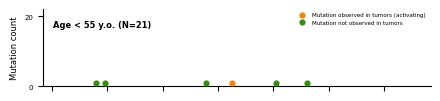

In [55]:
counts_per_position = mutations_in_tert_promoter[mutations_in_tert_promoter["SAMPLE_ID"].isin(younger_55)
                                            ].groupby(by = ['MUT_ID', 'Consequence', 'POS'])['ALT_DEPTH'].size().to_frame('Count').reset_index()
counts_per_position.columns = ['Mutation', 'Consequence', 'Pos', 'Count']

fig, ax = plt.subplots(1,1, figsize = figsize)
plot_count_track_tert(counts_per_position, axes=[ax], ax=0,
                      colors_dict=metrics_colors_dictionary, indel=False,
                      alpha = 1, dot_size = dot_size,
                     )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0,22)
ax.set_xlabel("")
ax.set_ylabel("Mutation count", fontsize = 12+fontadj)
# ax.set_title("Age < 55 y.o. (N=21)", fontsize = 14+fontadj)
ax.text(1294951, 17, "Age < 55 y.o. (N=21)", fontsize = 12+fontadj, fontweight = "bold")

ytickss = [x for x in ax.get_yticks()[0:-1:1] if not (x % 1) ] 
ax.set_yticks(ytickss)
ax.set_yticklabels([f"{int(x):,}" for x in ytickss], fontsize = 11+fontadj)

ax.set_xlim(xlim1, xlim2)
# ax.set_xticks(xtickss)
# ax.set_xticklabels([f"{int(x):,}" if not x%100 else "" for x in xtickss])
ax.tick_params(axis='x', labelbottom=False)

fig.legend(frameon = False, bbox_to_anchor = (0.9, 0.9), fontsize = 10+fontadj)
fig.savefig(f"{plots_dir}/TERT.young.needle.png", bbox_inches='tight', dpi = 300)
plt.show()

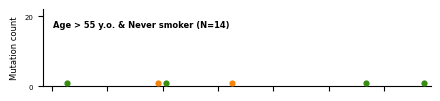

In [56]:
counts_per_position = mutations_in_tert_promoter[mutations_in_tert_promoter["SAMPLE_ID"].isin(older_55_non_smoker)
                                            ].groupby(by = ['MUT_ID', 'Consequence', 'POS'])['ALT_DEPTH'].size().to_frame('Count').reset_index()
counts_per_position.columns = ['Mutation', 'Consequence', 'Pos', 'Count']

fig, ax = plt.subplots(1,1, figsize = figsize)
plot_count_track_tert(counts_per_position, axes=[ax], ax=0,
                      colors_dict=metrics_colors_dictionary, indel=False,
                      alpha = 1, dot_size = dot_size,
                     )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0,22)
ax.set_xlabel("")
ax.set_ylabel("Mutation count", fontsize = 12+fontadj)
# ax.set_title("Age > 55 y.o. & Never smoker (N=14)", fontsize = 14+fontadj)
ax.text(1294951, 17, "Age > 55 y.o. & Never smoker (N=14)", fontsize = 12+fontadj, fontweight = "bold")

ytickss = [x for x in ax.get_yticks()[0:-1:1] if not (x % 1) ] 
ax.set_yticks(ytickss)
ax.set_yticklabels([f"{int(x):,}" for x in ytickss], fontsize = 11+fontadj)

ax.set_xlim(xlim1, xlim2)
xtickss = ax.get_xticks()[1:-1:1]
# ax.set_xticks(xtickss)
# ax.set_xticklabels([f"{int(x):,}" if not x%100 else "" for x in xtickss])
ax.tick_params(axis='x', labelbottom=False)


# fig.legend(frameon = False, bbox_to_anchor = (0.95, 0.85), fontsize = 10)
fig.savefig(f"{plots_dir}/TERT.old_non_smoker.needle.png", bbox_inches='tight', dpi = 300)
plt.show()

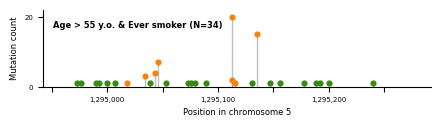

In [57]:
counts_per_position = mutations_in_tert_promoter[mutations_in_tert_promoter["SAMPLE_ID"].isin(older_55_smoker)
                                            ].groupby(by = ['MUT_ID', 'Consequence', 'POS'])['ALT_DEPTH'].size().to_frame('Count').reset_index()
counts_per_position.columns = ['Mutation', 'Consequence', 'Pos', 'Count']

fig, ax = plt.subplots(1,1, figsize = figsize)
plot_count_track_tert(counts_per_position, axes=[ax], ax=0,
                      colors_dict=metrics_colors_dictionary, indel=False,
                      alpha = 1,  dot_size = dot_size,
                     )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0,22)
ax.set_xlabel("Position in chromosome 5", fontsize = 12+fontadj)
ax.set_ylabel("Mutation count", fontsize = 12+fontadj)
# ax.set_title("Age > 55 y.o. & Ever smoker (N=34)", fontsize = 14+fontadj)
ax.text(1294951, 17, "Age > 55 y.o. & Ever smoker (N=34)", fontsize = 12+fontadj, fontweight = "bold")

ytickss = [x for x in ax.get_yticks()[0:-1:1] if not (x % 1) ] 
ax.set_yticks(ytickss)
ax.set_yticklabels([f"{int(x):,}" for x in ytickss], fontsize = 11+fontadj)

ax.set_xlim(xlim1, xlim2)
xtickss = ax.get_xticks()[1:-1:1]
ax.set_xticks(xtickss)
ax.set_xticklabels([f"{int(x):,}" if not x%100 else "" for x in xtickss], fontsize = 11+fontadj)

# fig.legend(frameon = False, bbox_to_anchor = (0.95, 0.85), fontsize = 10)
fig.savefig(f"{plots_dir}/TERT.old_smoker.needle.png", bbox_inches='tight', dpi = 300)
plt.show()

In [25]:
older_55 = clinical_data[clinical_data["AGE"] > 55]["SAMPLE_ID"].values

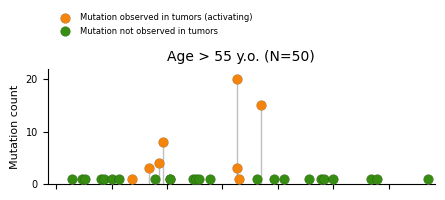

In [26]:
counts_per_position = mutations_in_tert_promoter[mutations_in_tert_promoter["SAMPLE_ID"].isin(older_55)
                                            ].groupby(by = ['MUT_ID', 'Consequence', 'POS'])['ALT_DEPTH'].size().to_frame('Count').reset_index()
counts_per_position.columns = ['Mutation', 'Consequence', 'Pos', 'Count']

fig, ax = plt.subplots(1,1, figsize = figsize)
plot_count_track_tert(counts_per_position, axes=[ax], ax=0,
                      colors_dict=metrics_colors_dictionary, indel=False,
                      alpha = 1, dot_size = dot_size,
                     )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0,22)
ax.set_xlabel("")
ax.set_ylabel("Mutation count", fontsize = 12+fontadj)
ax.set_title("Age > 55 y.o. (N=50)", fontsize = 14+fontadj)

ytickss = [x for x in ax.get_yticks()[0:-1:1] if not (x % 1) ] 
ax.set_yticks(ytickss)
ax.set_yticklabels([f"{int(x):,}" for x in ytickss], fontsize = 11+fontadj)

ax.set_xlim(xlim1, xlim2)
# ax.set_xticks(xtickss)
# ax.set_xticklabels([f"{int(x):,}" if not x%100 else "" for x in xtickss])
ax.tick_params(axis='x', labelbottom=False)

fig.legend(frameon = False, bbox_to_anchor = (0.55, 1.3), fontsize = 10+fontadj)
fig.savefig(f"{plots_dir}/TERT.old.needle.png", bbox_inches='tight', dpi = 300)
plt.show()